Routines for plotting the long-term performance (e.g., temporal mean bias/variance, zonal means/eofs) of the emulator, averaged across different randomly initialized and trained emulators.

In [17]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import yaml
from analysis.io_utils import load_params
from analysis.plot_config import params, contourLevels, colormap

In [18]:
# List all ensemble run_nums
#run_nums = ['MAE_mr0.25_seed_0_ft_dropPR', 'MAE_mr0.25_seed_10_ft_dropPR',
#            'MAE_mr0.25_seed_20_ft_dropPR', 'MAE_mr0.25_seed_30_ft_dropPR',
#            'MAE_mr0.25_seed_40_ft_dropPR']
run_nums = ['BASE_seed_0_1000epochs','BASE_seed_30_1000epochs', 'BASE_seed_40_1000epochs'] #, 
            #'BASE_seed_30_1000epochs', 'BASE_seed_40_1000epochs']

# Config file path
config_file_path = "config/config_0000_BASE_seed_0_1000epochs.yaml"
with open(config_file_path, "r") as f:
    config = yaml.safe_load(f)

dataset_params = config["dataset_params"]
short_analysis_params = config["short_analysis_params"]
long_analysis_params = config["long_analysis_params"]

root_dir = dataset_params["root_dir"]

params_filename = dataset_params["params_filename"]

params_fp = os.path.join(root_dir, run_nums[0], params_filename) 
train_params = load_params(params_fp) # Read in params file

In [19]:
# Gather training statistics

analysis_dir = os.path.join(root_dir, run_nums[0], "analysis", "train")

data = np.load(analysis_dir + '/temporal_mean.npz')
u_mean_train = data['U_mean']
v_mean_train = data['V_mean']
omega_mean_train = data['Omega_mean']

data = np.load(analysis_dir + '/zonal_mean.npz')
u_zonal_mean_train = data['U_zonal_mean']
omega_zonal_mean_train = data['Omega_zonal_mean']

data = np.load(analysis_dir + '/zonal_eof_pc.npz')
u_eofs_train = data['EOF_U']
u_expvar_train = data['exp_var_U']
omega_eofs_train = data['EOF_Omega']
omega_expvar_train = data['exp_var_Omega']

data = np.load(analysis_dir + "/zonal_eof_pc.npz", allow_pickle=True)
PC_acf_u_train = data["PC_acf_U"]
PC_acf_omega_train = data["PC_acf_Omega"]

data = np.load(analysis_dir + '/extremes.npz')
u_std = 2.34
v_std = 1.88
omega_std = 10.41
u_max_train = np.asarray(data['U_max'][::3]/u_std)
u_min_train = np.asarray(data['U_min'][::3]/u_std)
v_max_train = np.asarray(data['V_max'][::3]/v_std)
v_min_train = np.asarray(data['V_min'][::3]/v_std)
omega_max_train = np.asarray(data['Omega_max'][::3]/omega_std)
omega_min_train = np.asarray(data['Omega_min'][::3]/omega_std)

In [20]:
# Gather ground truth statistics

analysis_dir = os.path.join(root_dir, run_nums[0], "analysis", "truth")

data = np.load(analysis_dir + '/temporal_mean.npz')
u_mean_truth = data['U_mean']
v_mean_truth = data['V_mean']
omega_mean_truth = data['Omega_mean']

data = np.load(analysis_dir + '/zonal_mean.npz')
u_zonal_mean_truth = data['U_zonal_mean']
omega_zonal_mean_truth = data['Omega_zonal_mean']

data = np.load(analysis_dir + '/zonal_eof_pc.npz')
u_eofs_truth = data['EOF_U']
u_expvar_truth = data['exp_var_U']
omega_eofs_truth = data['EOF_Omega']
omega_expvar_truth = data['exp_var_Omega']

data = np.load(analysis_dir + "/zonal_eof_pc.npz", allow_pickle=True)
PC_acf_u_truth = data["PC_acf_U"]
PC_acf_omega_truth = data["PC_acf_Omega"]

div_truth = np.load(analysis_dir + '/div.npy')

data = np.load(analysis_dir + '/extremes.npz')
u_std = 2.34
v_std = 1.88
omega_std = 10.41
u_max_truth = np.asarray(data['U_max'][::3]/u_std)
u_min_truth = np.asarray(data['U_min'][::3]/u_std)
v_max_truth = np.asarray(data['V_max'][::3]/v_std)
v_min_truth = np.asarray(data['V_min'][::3]/v_std)
omega_max_truth = np.asarray(data['Omega_max'][::3]/omega_std)
omega_min_truth = np.asarray(data['Omega_min'][::3]/omega_std)

In [21]:
# Gather all emulator statistics

u_mean, v_mean, omega_mean = [], [], []
u_zonal_mean, omega_zonal_mean = [], []
u_eofs, omega_eofs = [], []
u_expvar, omega_expvar = [], []
PC_acf_u, PC_acf_omega = [], []
div = []
u_max, v_max, omega_max = [], [], []
u_min, v_min, omega_min = [], [], []
u_std = 2.34
v_std = 1.88
omega_std = 10.41

for run_num in run_nums:
    analysis_dir = os.path.join(root_dir, run_num, "analysis", "emulate")

    # Temporal means
    data = np.load(analysis_dir + '/temporal_mean.npz')
    print(f'u_mean.shape: {data["U_mean"].shape}')
    u_mean.append(data['U_mean'])
    v_mean.append(data['V_mean'])
    omega_mean.append(data['Omega_mean'])

    # Zonal means
    data = np.load(analysis_dir + '/zonal_mean.npz')
    print(f'u_zonal_mean.shape: {data["U_zonal_mean"].shape}')
    u_zonal_mean.append(data['U_zonal_mean'])
    omega_zonal_mean.append(data['Omega_zonal_mean'])

    # EOFs
    data = np.load(analysis_dir + '/zonal_eof_pc.npz')
    print(f'u_eof.shape: {data["EOF_U"].shape}')
    u_eofs.append(data['EOF_U'])
    u_expvar.append(data['exp_var_U'])
    omega_eofs.append(data['EOF_Omega'])
    omega_expvar.append(data['exp_var_Omega'])
    
    # PC Autocorrelation
    data = np.load(analysis_dir + "/zonal_eof_pc.npz", allow_pickle=True)
    PC_acf_u.append(data["PC_acf_U"])
    PC_acf_omega.append(data["PC_acf_Omega"])

    # Div
    data = np.load(analysis_dir + '/div.npy')
    print(f'div.shape: {data.shape}')
    div.append(data)

    # Extremes
    data = np.load(analysis_dir + '/extremes.npz')
    print(f'u_max.shape: {data["U_max"].shape}')
    u_max.append(data['U_max']/u_std)
    u_min.append(data['U_min']/u_std)
    v_max.append(data['V_max']/v_std)
    v_min.append(data['V_min']/v_std)
    omega_max.append(data['Omega_max']/omega_std)
    omega_min.append(data['Omega_min']/omega_std)
    

u_max = np.array(u_max)
u_min = np.array(u_min)
v_max = np.array(v_max)
v_min = np.array(v_min)
omega_max = np.array(omega_max)
omega_min = np.array(omega_min)

u_mean.shape: (256, 256)
u_zonal_mean.shape: (256,)
u_eof.shape: (256, 3)
div.shape: (100000,)
u_max.shape: (100000,)
u_mean.shape: (256, 256)
u_zonal_mean.shape: (256,)
u_eof.shape: (256, 3)
div.shape: (100000,)
u_max.shape: (100000,)
u_mean.shape: (256, 256)
u_zonal_mean.shape: (256,)
u_eof.shape: (256, 3)
div.shape: (100000,)
u_max.shape: (100000,)


### Temporal Means: Bias

In [22]:
# Compute average (over ensemble) absolute bias for U, V, Omega temporal means:
#   mean(abs(truth - train))
#   mean_i(abs(truth - pred_i))
#   mean_i(abs(train - pred_i))

def reduce(x, reduce_type):
    if reduce_type == "abs":
        return np.abs(x)
    return x


reduce_type = None

u_temporal_bias = []
v_temporal_bias = []
omega_temporal_bias = []

# Truth vs train
u_temporal_bias.append(reduce(u_mean_truth - u_mean_train, reduce_type))
v_temporal_bias.append(reduce(v_mean_truth - v_mean_train, reduce_type))
omega_temporal_bias.append(reduce(omega_mean_truth - omega_mean_train, reduce_type))

# Truth vs pred
u_abs_err, v_abs_err, omega_abs_err = [], [], []
for i in range(len(u_mean)):
    u_abs_err.append(reduce(u_mean_truth - u_mean[i], reduce_type))
    v_abs_err.append(reduce(v_mean_truth - v_mean[i], reduce_type))
    omega_abs_err.append(reduce(omega_mean_truth - omega_mean[i], reduce_type))

u_abs_err = np.mean(u_abs_err, axis=0)
v_abs_err = np.mean(v_abs_err, axis=0)
omega_abs_err = np.mean(omega_abs_err, axis=0)
print(f'u_abs_err.shape: {u_abs_err.shape}')

u_temporal_bias.append(u_abs_err)
v_temporal_bias.append(v_abs_err)
omega_temporal_bias.append(omega_abs_err)

# Train vs pred
u_abs_err, v_abs_err, omega_abs_err = [], [], []
for i in range(len(u_mean)):
    u_abs_err.append(reduce(u_mean_train - u_mean[i], reduce_type))
    v_abs_err.append(reduce(v_mean_train - v_mean[i], reduce_type))
    omega_abs_err.append(reduce(omega_mean_train - omega_mean[i], reduce_type))

u_abs_err = np.mean(u_abs_err, axis=0)
v_abs_err = np.mean(v_abs_err, axis=0)
omega_abs_err = np.mean(omega_abs_err, axis=0)
print(f'u_abs_err.shape: {u_abs_err.shape}')

u_temporal_bias.append(u_abs_err)
v_temporal_bias.append(v_abs_err)
omega_temporal_bias.append(omega_abs_err)

u_abs_err.shape: (256, 256)
u_abs_err.shape: (256, 256)


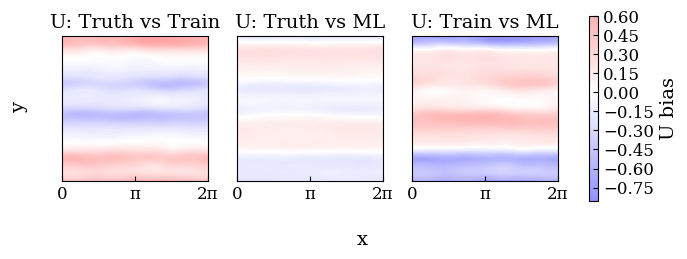

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharex=True, sharey=True)

titles_1 = ['U', 'V', 'Omega']
titles_2 = ['Truth vs Train', 'Truth vs ML', 'Train vs ML']
contourlevels = 100
vmax = [2, 0.5, 5]
vmin = [-2, -0.5, -5]

plotting_vars = [u_temporal_bias, v_temporal_bias, omega_temporal_bias]

for i in range(1):
    for j in range(3):
        im = axes[j].contourf(plotting_vars[i][j], 
                                levels=contourlevels, 
                                cmap='bwr', 
                                vmax=vmax[i], 
                                vmin=vmin[i])
        axes[j].set_title(f"{titles_1[i]}: {titles_2[j]}")

        # Set ticks only on edge subplots
        #if i == 2:
        axes[j].set_xticks([0, 256//2, 256])
        axes[j].set_xticklabels(['0', 'π', '2π'])
        #else:
        #    axes[j].set_xticks([])
        
        if j == 0:
            axes[j].set_yticks([0, 256//2, 256])
            axes[j].set_yticklabels(['0', 'π', '2π'])
        else:
            axes[j].set_yticks([])

    # Add one colorbar per row
    cbar = fig.colorbar(im, ax=axes[:], orientation='vertical', shrink=0.8)
    cbar.set_label(f"{titles_1[i]} bias")

# Shared labels
fig.text(0.5, 0.04, 'x', ha='center', fontsize=14)
fig.text(0.06, 0.5, 'y', va='center', rotation='vertical', fontsize=14)

# Set aspect ratio to equal and remove labels for all axes
for ax in axes.flat:
    ax.set_aspect('equal')

### Temporal Means: Variance

In [8]:
# Compute variance (over ensemble) of the temporal bias for U, V, Omega temporal means:
#   var_i(truth - pred_i)
#   var_i(train - pred_i)

def reduce(x, reduce_type):
    if reduce_type == "abs":
        return np.abs(x)
    return x


reduce_type = None

u_temporal_var = []
v_temporal_var = []
omega_temporal_var = []

# Truth vs pred
u_abs_err, v_abs_err, omega_abs_err = [], [], []
for i in range(len(u_mean)):
    u_abs_err.append(reduce(u_mean_truth - u_mean[i], reduce_type))
    v_abs_err.append(reduce(v_mean_truth - v_mean[i], reduce_type))
    omega_abs_err.append(reduce(omega_mean_truth - omega_mean[i], reduce_type))

u_var = np.var(u_abs_err, axis=0)
v_var = np.var(v_abs_err, axis=0)
omega_var = np.var(omega_abs_err, axis=0)
print(f'u_var.shape: {u_var.shape}')

u_temporal_var.append(u_var)
v_temporal_var.append(v_var)
omega_temporal_var.append(omega_var)

# Train vs pred
u_abs_err, v_abs_err, omega_abs_err = [], [], []
for i in range(len(u_mean)):
    u_abs_err.append(reduce(u_mean_train - u_mean[i], reduce_type))
    v_abs_err.append(reduce(v_mean_train - v_mean[i], reduce_type))
    omega_abs_err.append(reduce(omega_mean_train - omega_mean[i], reduce_type))

u_var = np.var(u_abs_err, axis=0)
v_var = np.var(v_abs_err, axis=0)
omega_var = np.var(omega_abs_err, axis=0)
print(f'u_var.shape: {u_var.shape}')

u_temporal_var.append(u_var)
v_temporal_var.append(v_var)
omega_temporal_var.append(omega_var)

u_var.shape: (256, 256)
u_var.shape: (256, 256)


In [ ]:
# Plot variance (over ensemble) bias of U, V, Omega temporal means

fig, axes = plt.subplots(3, 2, figsize=(6, 9))
titles_1 = ['U', 'V', 'Omega']
titles_2 = ['Truth vs ML', 'Train vs ML']
contourlevels = 100
vmax = [2, 0.5, 5]
vmin = [0, 0, 0]

plotting_vars = np.sqrt([u_temporal_var, v_temporal_var, omega_temporal_var])
for i in range(3):
    for j in range(2):
        im = axes[i, j].contourf(plotting_vars[i][j], 
                                 levels=contourlevels, 
                                 cmap='bwr', 
                                 vmax=vmax[i], 
                                 vmin=vmin[i])
        axes[i, j].set_title(titles_1[i] + ': ' +titles_2[j])

    #cb = fig.colorbar(im, ax=axes[i, :], orientation='horizontal', shrink=0.5)

# Set aspect ratio to equal and remove labels for all axes
for ax in axes.flat:
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])

### Zonal Means

u_zonal_mean_mean.shape: (256,)
omega_zonal_mean_mean.shape: (256,)


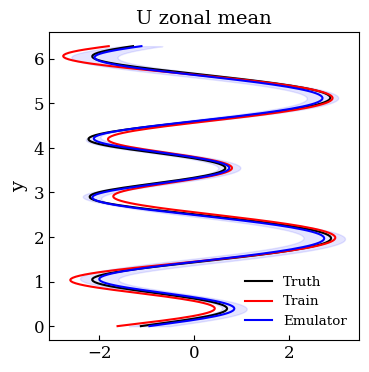

In [24]:
# Compute and plot zonal mean statistics across ensemble

plt.rcParams.update(params)

u_zonal_mean_mean = np.mean(u_zonal_mean, axis=0)
u_zonal_mean_std = np.std(u_zonal_mean, axis=0)
print(f'u_zonal_mean_mean.shape: {u_zonal_mean_mean.shape}')

omega_zonal_mean_mean = np.mean(omega_zonal_mean, axis=0)
omega_zonal_mean_std = np.std(omega_zonal_mean, axis=0)
print(f'omega_zonal_mean_mean.shape: {omega_zonal_mean_mean.shape}')

fig, axes = plt.subplots(figsize=(4, 4),
                         sharey=True)

y = np.linspace(0, 2*np.pi, u_zonal_mean_mean.shape[0])

axes.plot(u_zonal_mean_truth, y, '-k', label='Truth')
axes.plot(u_zonal_mean_train, y, '-r', label='Train')
axes.plot(u_zonal_mean_mean, y, '-b', label='Emulator')
axes.fill_betweenx(y, u_zonal_mean_mean - u_zonal_mean_std, u_zonal_mean_mean + u_zonal_mean_std, alpha=0.1, color='b')
axes.set_ylabel('y')

#axes[1].plot(omega_zonal_mean_truth, y, '-k', label='Truth')
#axes[1].plot(omega_zonal_mean_train, y, '-r', label='Train')
#axes[1].plot(omega_zonal_mean_mean, y, '-b', label='Emulator')
#axes[1].fill_betweenx(y, omega_zonal_mean_mean - omega_zonal_mean_std, omega_zonal_mean_mean + omega_zonal_mean_std, alpha=0.25, color='b')

axes.set_title(f'U zonal mean')
#axes[1].set_title(f'$\omega$ zonal mean')

axes.legend(frameon=False, fontsize='x-small', loc='lower right')
# plt.tight_layout()
# axes[1].legend(frameon=False)

### EOF: U

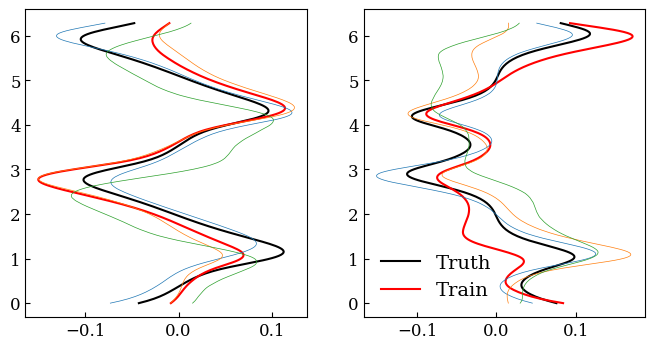

In [32]:
# Compute and plot zonal EOF of U statistics across ensemble

plt.rcParams.update(params)

u_eofs_mean, u_eofs_std = [], []
neofs = 2

for i in range(neofs):
    u_eofs_mean.append(np.mean([u_eofs[j][:, i] for j in range(len(u_eofs))], axis=0))
    u_eofs_std.append(np.std([u_eofs[j][:, i] for j in range(len(u_eofs))], axis=0))


fig, axes = plt.subplots(1, 2, figsize=(8, 4))

y = np.linspace(0, 2*np.pi, u_eofs_train.shape[0])

axs = axes.flatten()
for i in range(neofs):
    axs[i].plot(u_eofs_truth[:, i], y, '-k', label='Truth')
    axs[i].plot(u_eofs_train[:, i], y, '-r', label='Train')
    #axs[i].plot(u_eofs_mean[i], y, '-b', label='ML')
    #axs[i].fill_betweenx(y, u_eofs_mean[i] - u_eofs_std[i], u_eofs_mean[i] + u_eofs_std[i],
    #                     color='b', alpha=0.1)
    
for i in range(3):
    ueof1 = u_eofs[i][:, 0]
    if i==2:
        ueof1 = -1 * u_eofs[i][:, 0]
    axs[0].plot(ueof1, y, linewidth=0.5)
for i in range(3):
    ueof2 = u_eofs[i][:, 1]
    axs[1].plot(ueof2, y, linewidth=0.5)

plt.legend(frameon=False)

### EOF: Omega

In [ ]:
# Compute and plot zonal EOF of Omega statistics across ensemble

omega_eofs_mean, omega_eofs_std = [], []
neofs = 2

for i in range(neofs):
    omega_eofs_mean.append(np.mean([omega_eofs[j][:, i] for j in range(len(omega_eofs))], axis=0))
    omega_eofs_std.append(np.std([omega_eofs[j][:, i] for j in range(len(omega_eofs))], axis=0))


fig, axes = plt.subplots(1, 2, figsize=(8, 4))

y = np.linspace(0, 2*np.pi, omega_eofs_train.shape[0])

axs = axes.flatten()
for i in range(neofs):
    axs[i].plot(omega_eofs_truth[i, :], y, '-k', label='Truth')
    axs[i].plot(omega_eofs_train[:, i], y, '-r', label='Train')
    axs[i].plot(omega_eofs_mean[i], y, '-b', label='ML')
    axs[i].fill_betweenx(y, omega_eofs_mean[i] - omega_eofs_std[i], omega_eofs_mean[i] + omega_eofs_std[i],
                         color='b', alpha=0.1)

plt.legend()

### PC Auto Corr

<>:54: SyntaxWarning: invalid escape sequence '\D'
<>:55: SyntaxWarning: invalid escape sequence '\D'
<>:54: SyntaxWarning: invalid escape sequence '\D'
<>:55: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_370751/2841988900.py:54: SyntaxWarning: invalid escape sequence '\D'
  axes[1,0].set_xlabel('$\Delta t$')
/tmp/ipykernel_370751/2841988900.py:55: SyntaxWarning: invalid escape sequence '\D'
  axes[1,1].set_xlabel('$\Delta t$')


Text(0.5, 0, '$\\Delta t$')

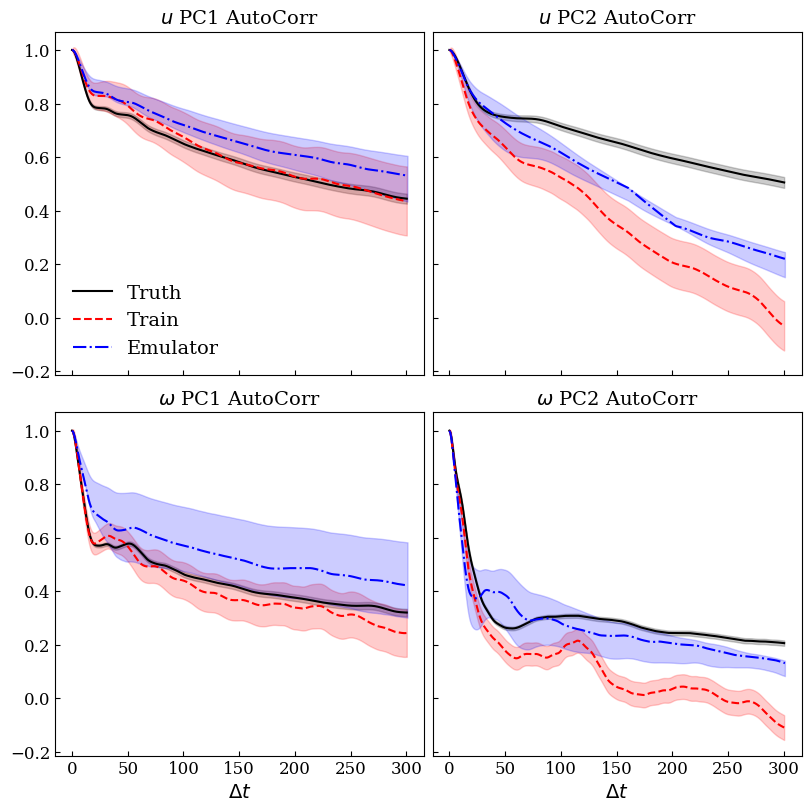

In [33]:
label = [r"Truth", r"Train", r"Emulator"]
colors = ['-k', '--r', '-.b']
color=['k', 'r', 'b']

fig, axes = plt.subplots(2, 2, figsize=(8, 8), layout='constrained',
                         sharex=True, sharey=True)
plt.rcParams.update(params)

datasets = [('truth', PC_acf_u_truth, PC_acf_omega_truth),
            ('train', PC_acf_u_train, PC_acf_omega_train),
            ('emulator', PC_acf_u, PC_acf_omega)]

for i, j in enumerate(datasets):

    curve_id, acf_u, acf_omega = j

    for count in range(2):

        if curve_id == 'emulator':
            # Compute emulator statistics
            acf_u_median = np.median([PC_acf_u[k][count]['acf'] for k in range(len(run_nums))], axis=0)
            acf_u_ub = np.quantile([PC_acf_u[k][count]['acf'] for k in range(len(run_nums))], 0.75, axis=0)
            acf_u_lb = np.quantile([PC_acf_u[k][count]['acf'] for k in range(len(run_nums))], 0.25, axis=0)

            acf_omega_median = np.median([PC_acf_omega[k][count]['acf'] for k in range(len(run_nums))], axis=0)
            acf_omega_ub = np.quantile([PC_acf_omega[k][count]['acf'] for k in range(len(run_nums))], 0.75, axis=0)
            acf_omega_lb = np.quantile([PC_acf_omega[k][count]['acf'] for k in range(len(run_nums))], 0.25, axis=0)
        else:
            acf_u_median = acf_u[count]['acf']
            acf_u_ub = acf_u[count]['confint'][:,0]
            acf_u_lb = acf_u[count]['confint'][:,1]

            acf_omega_median = acf_omega[count]['acf']
            acf_omega_ub = acf_omega[count]['confint'][:,0]
            acf_omega_lb = acf_omega[count]['confint'][:,1]

        # Training data and emulation data are saved at different time steps
        if curve_id == 'emulator':
            time = np.linspace(0, acf_u_median.shape[0], acf_u_median.shape[0])
        else:
            time = np.linspace(0, acf_u_median.shape[0]/train_params["target_step"], acf_u_median.shape[0])

        axes[0,count].plot(time, acf_u_median, colors[i], label=label[i])
        axes[0,count].fill_between(time, acf_u_lb, acf_u_ub, color=color[i], alpha=0.2)

        axes[1,count].plot(time, acf_omega_median, colors[i], label=label[i])
        axes[1,count].fill_between(time, acf_omega_lb, acf_omega_ub, color=color[i], alpha=0.2)
        
        axes[0,count].set_title(rf'$u$ PC{count+1} AutoCorr')
        axes[1,count].set_title(rf'$\omega$ PC{count+1} AutoCorr')

axes[0,0].legend(frameon=False)
#axes[1,0].legend(frameon=False)
axes[1,0].set_xlabel('$\Delta t$')
axes[1,1].set_xlabel('$\Delta t$')


<>:52: SyntaxWarning: invalid escape sequence '\D'
<>:52: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_370751/2544128170.py:52: SyntaxWarning: invalid escape sequence '\D'
  axes.set_xlabel('$\Delta t$')


(0.2, 1.0)

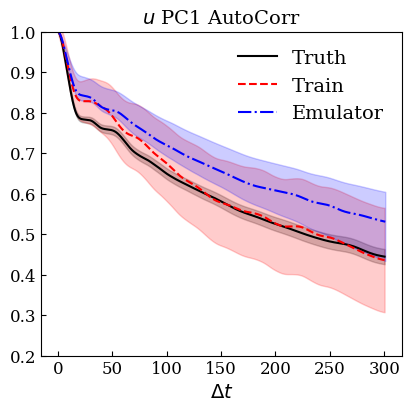

In [40]:
label = [r"Truth", r"Train", r"Emulator"]
colors = ['-k', '--r', '-.b']
color=['k', 'r', 'b']

fig, axes = plt.subplots(figsize=(4, 4), layout='constrained',
                         sharex=True, sharey=True)
plt.rcParams.update(params)

datasets = [('truth', PC_acf_u_truth),
            ('train', PC_acf_u_train),
            ('emulator', PC_acf_u)]

for i, j in enumerate(datasets):

    curve_id, acf_u = j

    for count in range(1):

        if curve_id == 'emulator':
            # Compute emulator statistics
            acf_u_median = np.median([PC_acf_u[k][count]['acf'] for k in range(len(run_nums))], axis=0)
            acf_u_ub = np.quantile([PC_acf_u[k][count]['acf'] for k in range(len(run_nums))], 0.75, axis=0)
            acf_u_lb = np.quantile([PC_acf_u[k][count]['acf'] for k in range(len(run_nums))], 0.25, axis=0)

            #acf_omega_median = np.median([PC_acf_omega[k][count]['acf'] for k in range(len(run_nums))], axis=0)
            #acf_omega_ub = np.quantile([PC_acf_omega[k][count]['acf'] for k in range(len(run_nums))], 0.75, axis=0)
            #acf_omega_lb = np.quantile([PC_acf_omega[k][count]['acf'] for k in range(len(run_nums))], 0.25, axis=0)
        else:
            acf_u_median = acf_u[count]['acf']
            acf_u_ub = acf_u[count]['confint'][:,0]
            acf_u_lb = acf_u[count]['confint'][:,1]

            #acf_omega_median = acf_omega[count]['acf']
            #acf_omega_ub = acf_omega[count]['confint'][:,0]
            #acf_omega_lb = acf_omega[count]['confint'][:,1]

        # Training data and emulation data are saved at different time steps
        if curve_id == 'emulator':
            time = np.linspace(0, acf_u_median.shape[0], acf_u_median.shape[0])
        else:
            time = np.linspace(0, acf_u_median.shape[0]/train_params["target_step"], acf_u_median.shape[0])

        axes.plot(time, acf_u_median, colors[i], label=label[i])
        axes.fill_between(time, acf_u_lb, acf_u_ub, color=color[i], alpha=0.2)

        #axes[1,count].plot(time, acf_omega_median, colors[i], label=label[i])
        #axes[1,count].fill_between(time, acf_omega_lb, acf_omega_ub, color=color[i], alpha=0.2)
        
        axes.set_title(rf'$u$ PC{count+1} AutoCorr')
        #axes[1,count].set_title(rf'$\omega$ PC{count+1} AutoCorr')

        axes.set_xlabel('$\Delta t$')

axes.legend(frameon=False)
axes.set_ylim([0.2, 1])
#axes[1,0].legend(frameon=False)
#axes[1,0].set_xlabel('$\Delta t$')
#axes[1,1].set_xlabel('$\Delta t$')


### Divergence

<>:14: SyntaxWarning: invalid escape sequence '\l'
<>:15: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\l'
<>:15: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_370751/3676980111.py:14: SyntaxWarning: invalid escape sequence '\l'
  axes.set_title('$ \langle |\\nabla \cdot u |\\rangle$')
/tmp/ipykernel_370751/3676980111.py:15: SyntaxWarning: invalid escape sequence '\D'
  axes.set_xlabel('$\Delta t$')


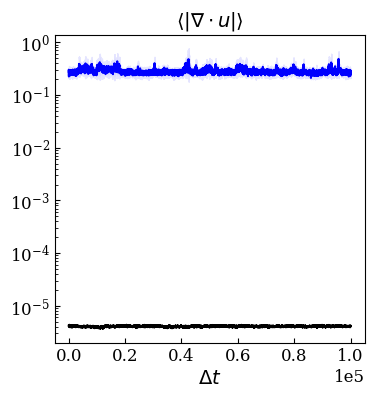

In [35]:
# Compute and plot statistics (across emulators) of divergence of flow

plt.rcParams.update(params)

div_mean = np.mean(div, axis=0)
div_std = np.std(div, axis=0)

fig, axes = plt.subplots(1, figsize=(4, 4))

x = np.arange(1, div_mean.shape[0]+1)
axes.semilogy(x, div_truth[:len(x)], '-k', label='Truth')
axes.semilogy(x, div_mean, '-b', label='Emulator')
axes.fill_between(x, div_mean-div_std, div_mean+div_std, color='b', alpha=0.1)
axes.set_title('$ \langle |\\nabla \cdot u |\\rangle$')
axes.set_xlabel('$\Delta t$')
axes.ticklabel_format(axis='x', style='sci', scilimits=(0, 5))

### Return Periods of Extremes

Number of ensembles: 3
bins: 0.0200002027020179 1973.3599999993369
(3, 100)
Number of ensembles: 3
bins: 0.020000199999999996 2000.0200000109148
(3, 100)
Number of ensembles: 3
bins: 0.0200002027020179 1973.3599999993369
(3, 100)
Number of ensembles: 3
bins: 0.020000199999999996 2000.0200000109148
(3, 100)
Number of ensembles: 3
bins: 0.0200002027020179 1973.3599999993369
(3, 100)
Number of ensembles: 3
bins: 0.020000199999999996 2000.0200000109148
(3, 100)
Number of ensembles: 3
bins: 0.0200002027020179 1973.3599999993369
(3, 100)
Number of ensembles: 3
bins: 0.020000199999999996 2000.0200000109148
(3, 100)
Number of ensembles: 3
bins: 0.0200002027020179 1973.3599999993369
(3, 100)
Number of ensembles: 3
bins: 0.020000199999999996 2000.0200000109148
(3, 100)
Number of ensembles: 3
bins: 0.0200002027020179 1973.3599999993369
(3, 100)
Number of ensembles: 3
bins: 0.020000199999999996 2000.0200000109148
(3, 100)


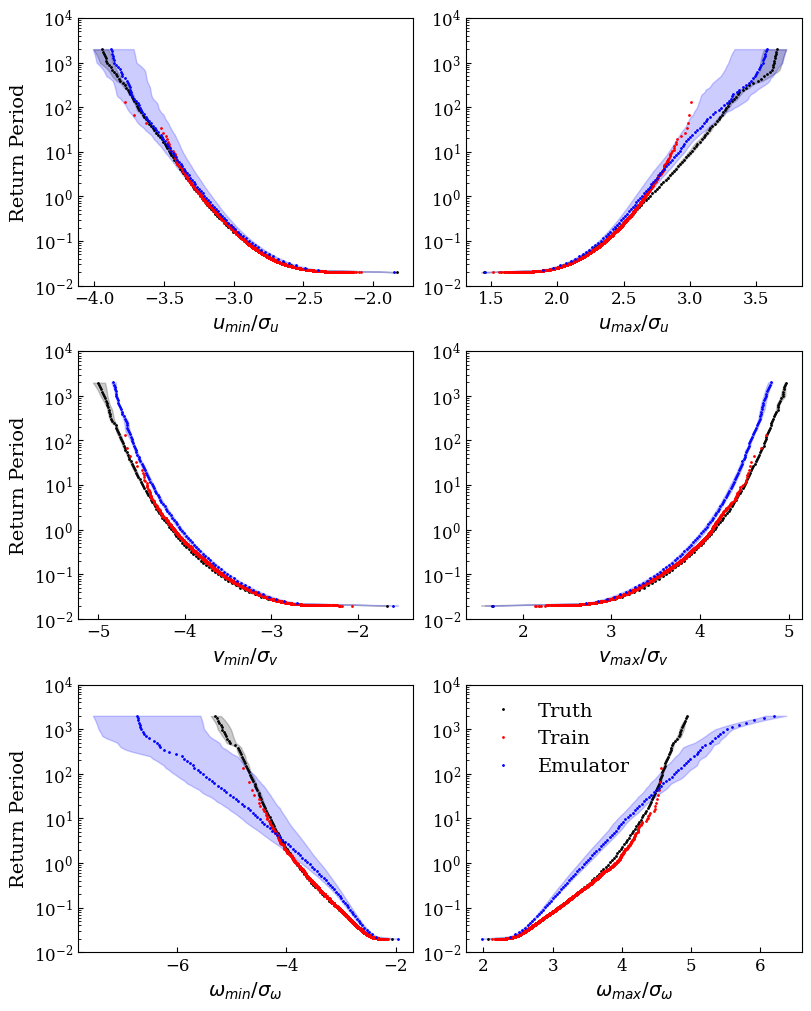

In [38]:
from analysis.metrics import empirical_return_period, ensemble_return_period_amplitude
from analysis.plot_config import params

# Reshape truth to mimic ensemble
u_max_truth = np.reshape(u_max_truth[:296001], shape=(len(run_nums), -1))
u_min_truth = np.reshape(u_min_truth[:296001], shape=(len(run_nums), -1))
v_max_truth = np.reshape(v_max_truth[:296001], shape=(len(run_nums), -1))
v_min_truth = np.reshape(v_min_truth[:296001], shape=(len(run_nums), -1))
omega_max_truth = np.reshape(omega_max_truth[:296001], shape=(len(run_nums), -1))
omega_min_truth = np.reshape(omega_min_truth[:296001], shape=(len(run_nums), -1))

confidence_level_type = 'percentile'
confidence_level = 25

markersize = 1
bin_num = 100
dt_data = 0.02

fig, axes = plt.subplots(3, 2, figsize=(8, 10), layout='constrained')
plt.rcParams.update(params)

data_u = (u_min_truth, u_min_train, u_min, u_max_truth, u_max_train, u_max)
data_v = (v_min_truth, v_min_train, v_min, v_max_truth, v_max_train, v_max)
data_omega = (omega_min_truth, omega_min_train, omega_min, omega_max_truth, omega_max_train, omega_max)
data_labels_min = [r'$u_{min}/\sigma_u$', r'$v_{min}/\sigma_v$', r'$\omega_{min}/\sigma_{\omega}$']
data_labels_max = [r'$u_{max}/\sigma_u$', r'$v_{max}/\sigma_v$', r'$\omega_{max}/\sigma_{\omega}$']

for i, data_i in enumerate([data_u, data_v, data_omega]):

    data_min_truth, data_min_train, data_min, data_max_truth, data_max_train, data_max = data_i

    ### min

    #Truth
    data_amplitude_mean, data_amplitude_min, data_amplitude_max, return_periods = ensemble_return_period_amplitude(
        np.asarray(np.abs(data_min_truth)), dt=dt_data, bins_num=bin_num, confidence_level_type=confidence_level_type, confidence_level=confidence_level)
    axes[i, 0].semilogy(-data_amplitude_mean, return_periods, 'ok', label='Truth', markersize=markersize)
    axes[i, 0].fill_betweenx(return_periods, -data_amplitude_max, -data_amplitude_min, color='k', alpha=0.2)

    # Train
    return_period, data_amplitude = empirical_return_period(np.abs(data_min_train), dt=dt_data)
    axes[i, 0].semilogy(-data_amplitude, return_period, 'or', label='Train', markersize=markersize)

    # Emulator
    data_amplitude_mean, data_amplitude_min, data_amplitude_max, return_periods = ensemble_return_period_amplitude(
        np.asarray(np.abs(data_min)), dt=dt_data, bins_num=bin_num, confidence_level_type=confidence_level_type, confidence_level=confidence_level)
    axes[i, 0].semilogy(-data_amplitude_mean, return_periods, 'ob', label='Emulator', markersize=markersize)
    axes[i, 0].fill_betweenx(return_periods, -data_amplitude_max, -data_amplitude_min, color='b', alpha=0.2)


    axes[i, 0].set_xlabel(data_labels_min[i])
    axes[i, 0].set_ylabel('Return Period')

    ### Omega max

    # Truth
    data_amplitude_mean, data_amplitude_min, data_amplitude_max, return_periods = ensemble_return_period_amplitude(
        np.asarray(np.abs(data_max_truth)), dt=dt_data, bins_num=bin_num, confidence_level_type=confidence_level_type, confidence_level=confidence_level)
    axes[i, 1].semilogy(data_amplitude_mean, return_periods, 'ok', label='Truth', markersize=markersize)
    axes[i, 1].fill_betweenx(return_periods, data_amplitude_max, data_amplitude_min, color='k', alpha=0.2)

    # Train
    return_period, data_amplitude = empirical_return_period(np.abs(data_max_train), dt=dt_data)
    axes[i, 1].semilogy(data_amplitude, return_period, 'or', label='Train', markersize=markersize)

    # Emulator
    data_amplitude_mean, data_amplitude_min, data_amplitude_max, return_periods = ensemble_return_period_amplitude(
        np.asarray(np.abs(data_max)), dt=dt_data, bins_num=bin_num, confidence_level_type=confidence_level_type, confidence_level=confidence_level)
    axes[i, 1].semilogy(data_amplitude_mean, return_periods, 'ob', label='Emulator', markersize=markersize)
    axes[i, 1].fill_betweenx(return_periods, data_amplitude_max, data_amplitude_min, color='b', alpha=0.2)

    axes[i, 1].set_xlabel(data_labels_max[i])

    #for count in range(omega_max_emulator_normalized.shape[0]):
    #    return_period, data_amplitude = empirical_return_period(np.abs(omega_max_emulator_normalized[count,#:]), dt=dt_data)
    #    axes[1].semilogy(data_amplitude, return_period, 'og', label='Train', markersize=markersize)

for ax in axes.flatten():
    ax.set_ylim([1e-2, 1e4])
# axes[0].set_xlim([-4.5, -1.2])
# axes[1].set_xlim([1.2, 4.5])
# plt.suptitle('97.5% CI error calculated with 200 ensembles of 2500 snapshots')
axes[2, 1].legend(loc='upper left', frameon=False)

plt.show()